In [ ]:
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install tensorflow

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch 10 completed.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


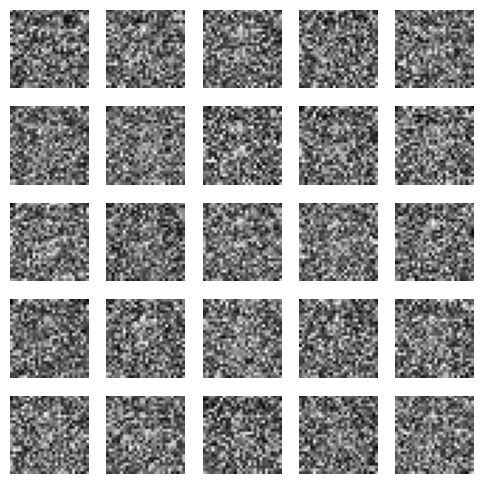

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Epoch 20 completed.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


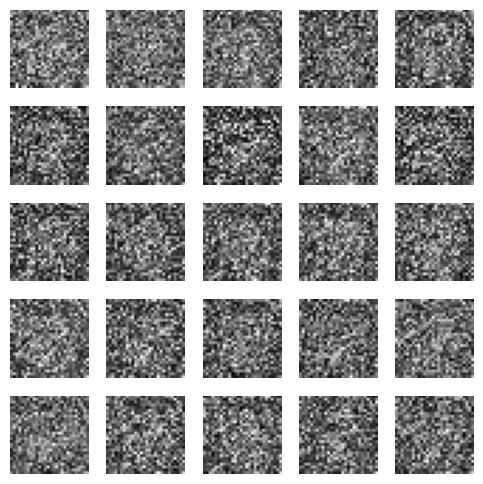

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Epoch 30 completed.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


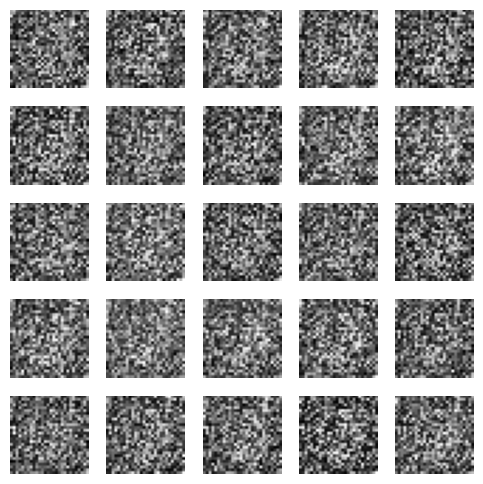

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Epoch 40 completed.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


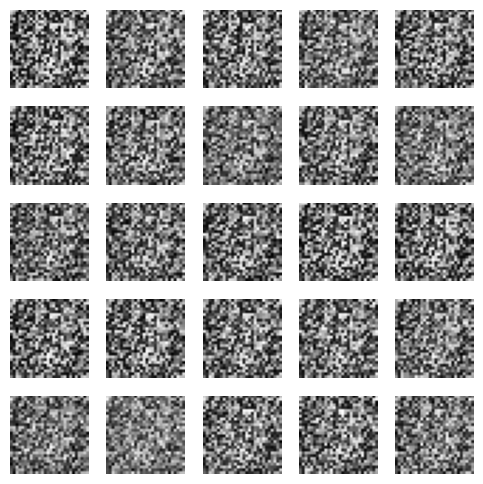

In [ ]:
import numpy as np, matplotlib.pyplot as plt, tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten, LeakyReLU, Input
from tensorflow.keras.datasets import mnist

# Load and preprocess
(X_train, _), _ = mnist.load_data()
X_train = np.expand_dims((X_train.astype('float32') - 127.5) / 127.5, -1)

# Generator
def build_gen():
    model = Sequential([
        Input(shape=(100,)),
        Dense(128), LeakyReLU(0.2),
        Dense(784, activation='tanh'),
        Reshape((28, 28, 1))
    ])
    return model

# Discriminator
def build_disc():
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Flatten(), Dense(128), LeakyReLU(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
    return model

# Build models
gen, disc = build_gen(), build_disc()
disc.trainable = False  # Set AFTER compiling disc
gan = Sequential([gen, disc])
gan.compile('adam', 'binary_crossentropy')

# Show images
def show_images(generator, n=5):
    noise = np.random.normal(0, 1, (n*n, 100))
    imgs = 0.5 * generator.predict(noise) + 0.5
    plt.figure(figsize=(5, 5))
    for i in range(n * n):
        plt.subplot(n, n, i+1)
        plt.imshow(imgs[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.tight_layout(); plt.show()

# Training
def train(epochs=40, batch=100):
    for e in range(1, epochs+1):
        idx = np.random.randint(0, X_train.shape[0], batch//2)
        real, noise = X_train[idx], np.random.randn(batch//2, 100)
        fake = gen.predict(noise)
        disc.trainable = True
        disc.train_on_batch(real, np.ones((batch//2, 1)))
        disc.train_on_batch(fake, np.zeros((batch//2, 1)))
        disc.trainable = False
        gan.train_on_batch(np.random.randn(batch, 100), np.ones((batch, 1)))
        if e % 10 == 0:
            print(f"Epoch {e} completed.")
            show_images(gen)

# Run
train()
